# Rotation

Scaling, or simply resizing, is the process of increasing or decreasing the size of an image in terms of width and height.

### import the necessary packages

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import imutils
import cv2

### load the image and show it

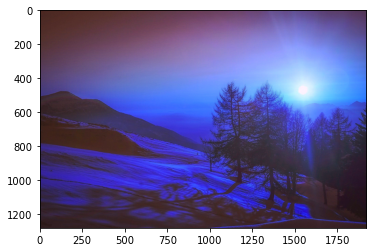

In [2]:
image = cv2.imread("image/img.jpg")
plt.imshow(image)
plt.show()

### Aspect Ratio

AspectRatio = Width/Height

In [3]:
# we need to keep in mind aspect ratio so the image does not look skewed
# or distorted -- therefore, we calculate the ratio of the new image to
# the old image. Let's make our new image have a width of 150 pixels
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

### Width Resize

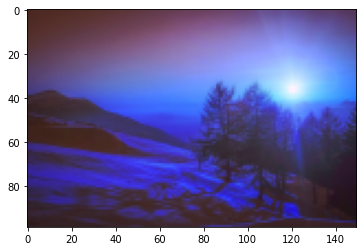

In [4]:
# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

cv2.imshow("Resized (Width)", resized)
cv2.waitKey(0)

plt.imshow(resized)
plt.show()

### Height Resize

In [5]:
# what if we wanted to adjust the height of the image? We can apply
# the same concept, again keeping in mind the aspect ratio, but instead
# calculating the ratio based on height -- let's make the height of the
# resized image 50 pixels
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

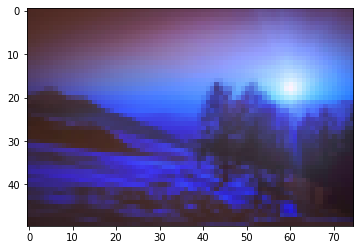

In [6]:
# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

cv2.imshow("Resized (Width)", resized)
cv2.waitKey(0)

plt.imshow(resized)
plt.show()

### Resize using imutils

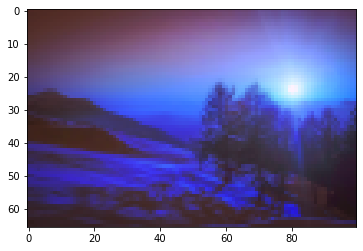

In [7]:
# of course, calculating the ratio each and every time we want to resize
# an image is a real pain -- let's create a  function where we can specify
# our target width or height, and have it take care of the rest for us.
resized = imutils.resize(image, width=100)

cv2.imshow("Resized (Width)", resized)
cv2.waitKey(0)

plt.imshow(resized)
plt.show()

### Interpolation Methods

Up until now we have used only the `cv2.INTER_AREA`  method for interpolation. And as I mentioned at the top of this article, the goal of an interpolation function is to examine neighborhoods of pixels and use these neighborhoods optically increase or decrease the size of image without introducing distortions (or at least as few distortions as possible).

The first method is nearest neighbor interpolation, specified by the `cv2.INTER_NEAREST`  flag. This method is the simplest approach to interpolation. Instead of calculating weighted averages of neighboring pixels or applying complicated rules, this method simply finds the “nearest” neighboring pixel and assumes the intensity value. While this method is fast and simple, the quality of the resized image tends to be quite poor and can lead to “blocky” artifacts.

Secondly, we have the `cv2.INTER_LINEAR`  method with performs bilinear interpolation — this is the method that OpenCV uses by default when resizing images. The general idea behind bilinear interpolation can be found in any elementary school math textbook — slope intercept form:

`y = mx + b`

Obviously I am generalizing quite a bit, but the takeaway is that we are doing more than simply finding the “nearest” pixel and assuming the value of it (like in nearest neighbor interpolation) — now we are taking neighboring pixels and using this neighborhood to actually calculate what the interpolated value should be (rather than just assuming the nearest pixel value).

Thirdly, we have the `cv2.INTER_AREA`  interpolation method. To be completely honest, I have found very little documentation about this method. As far as I can tell it is synonymous with “nearest neighbor interpolation”. If I am wrong (or if anyone has any extra documentation on this method), I would really like to see it.

Finally, we have `cv2.INTER_CUBIC`  and `cv2.INTER_LANCZOS4` . These methods are slower (since they no longer use simple linear interpolation and instead use splines) and utilize bicubic interpolation over square pixel neighborhoods. The `cv2.INTER_CUBIC`  method operates on a 4 x 4 pixel neighbor and `cv2.INTER_LANCZOS4`  over a 8 x 8 pixel neighborhood. In general I rarely see a the `cv2.INTER_LANCZOS4`  method used in practice.

In [8]:
# construct the list of interpolation methods
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

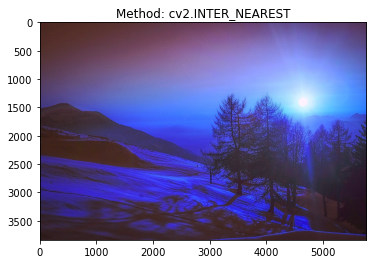

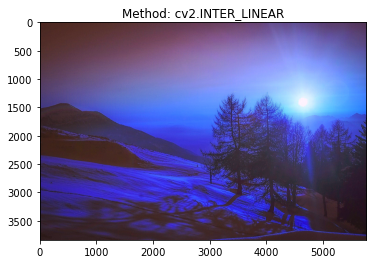

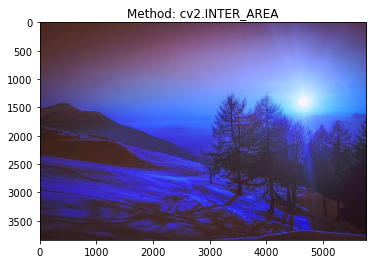

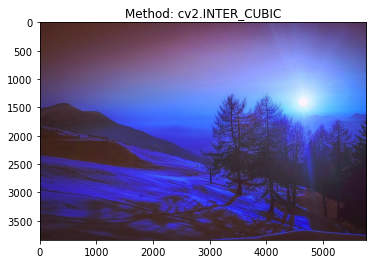

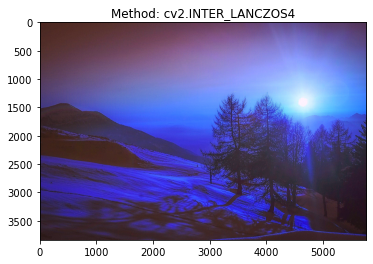

In [9]:
# loop over the interpolation methods
for (name, method) in methods:
    # increase the size of the image by 3x using the current interpolation method
    resized = imutils.resize(image, width=image.shape[1] * 3, inter=method)
    
    cv2.imshow("Method: {}".format(name), resized)
    cv2.waitKey(0)
    
    plt.imshow(resized)
    plt.title("Method: {}".format(name))
    plt.show()

### So which method interpolation methods should you be using?

In general, `cv2.INTER_NEAREST`  is quite fast, but does not provide the highest quality results. So in very resource-constrained environments, consider using nearest neighbor interpolation — otherwise you probably won’t use this interpolation method much (especially if you are trying to increase the size of an image).

When increasing (upsampling) the size of an image, consider using `cv2.INTER_LINEAR`  and `cv2.INTER_CUBIC` . The `cv2.INTER_LINEAR`  method tends to be slightly faster than the `cv2.INTER_CUBIC`  method, but go with whichever one gives you the best results for your images.

When decreasing (downsampling) the size of an image, the OpenCV documentation suggests using   `cv2.INTER_AREA` — although as far as I can tell, this method is very similar to nearest neighbor interpolation. In either case, decreasing the size of an image (in terms of quality) is always an easier task than increasing the size of an image.

Finally, as a general rule, `cv2.INTER_LINEAR`  interpolation method is recommended as the default for whenever you’re upsampling or downsampling — it simply provides the highest quality results at a modest computation cost.